In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
Cp_water = 4181  # Specific heat capacity of water in J/(kg*K)

In [3]:
def get_input_or_sample():
    choice = input("Would you like to use sample values? (y/n): ").strip().lower()
    if choice == 'y':
        return {
            "mass_flow_rate_shell": 1.5,  # kg/s
            "mass_flow_rate_tube": 1.0,  # kg/s
            "delta_T_shell": 20,  # K
            "delta_T_tube": 15,  # K
            "U_shell": 1000,  # W/(m^2*K)
            "U_tube": 800,  # W/(m^2*K)
            "shell_diameter": 0.5,  # m
            "tube_length": 5.0,  # m
            "tube_diameter": 0.025,  # m
            "number_of_tubes": 50,
            "plate_width": 0.5,  # m
            "plate_length": 1.0,  # m
            "plate_spacing": 0.005,  # m
            "number_of_plates": 30
        }
    else:
        return {
            "mass_flow_rate_shell": float(input("Enter mass flow rate for shell side (kg/s): ")),
            "mass_flow_rate_tube": float(input("Enter mass flow rate for tube side (kg/s): ")),
            "delta_T_shell": float(input("Enter temperature difference for shell side (K): ")),
            "delta_T_tube": float(input("Enter temperature difference for tube side (K): ")),
            "U_shell": float(input("Enter overall heat transfer coefficient for shell side (W/(m^2*K)): ")),
            "U_tube": float(input("Enter overall heat transfer coefficient for tube side (W/(m^2*K)): ")),
            "shell_diameter": float(input("Enter shell diameter (m): ")),
            "tube_length": float(input("Enter tube length (m): ")),
            "tube_diameter": float(input("Enter tube diameter (m): ")),
            "number_of_tubes": int(input("Enter number of tubes: ")),
            "plate_width": float(input("Enter plate width (m): ")),
            "plate_length": float(input("Enter plate length (m): ")),
            "plate_spacing": float(input("Enter plate spacing (m): ")),
            "number_of_plates": int(input("Enter number of plates: "))
        }

In [4]:
def heat_transfer_rate(mass_flow_rate, Cp, delta_T):
    return mass_flow_rate * Cp * delta_T

In [5]:
# Log Mean Temperature Difference (LMTD)
def lmtd(delta_T1, delta_T2):
    return (delta_T1 - delta_T2) / math.log(delta_T1 / delta_T2)

In [6]:
def overall_heat_transfer_coefficient(U_shell, U_tube):
    return 1 / (1/U_shell + 1/U_tube)

In [7]:
def heat_transfer_area(Q, U, LMTD):
    return Q / (U * LMTD)

In [8]:
def pressure_drop_shell_and_tube(flow_rate, length, diameter, density, viscosity):
    # Darcy-Weisbach equation (simplified for turbulent flow)
    f = 0.079 / (flow_rate * diameter / (viscosity / density))**0.25  # Friction factor
    delta_P = f * (length / diameter) * (density * flow_rate**2 / 2)
    return delta_P

In [9]:
def pressure_drop_plate(flow_rate, length, spacing, density, viscosity):
    # Similar simplified calculation for pressure drop across plates
    Re = flow_rate * spacing / viscosity
    f = 0.079 / Re**0.25  # Friction factor
    delta_P = f * (length / spacing) * (density * flow_rate**2 / 2)
    return delta_P

In [10]:
def plot_temperature_profile(T_shell_in, T_shell_out, T_tube_in, T_tube_out, length):
    x = [0, length]
    y_shell = [T_shell_in, T_shell_out]
    y_tube = [T_tube_in, T_tube_out]
    
    plt.plot(x, y_shell, label="Shell-side Temperature")
    plt.plot(x, y_tube, label="Tube-side Temperature")
    plt.xlabel('Length of Heat Exchanger (m)')
    plt.ylabel('Temperature (K)')
    plt.title('Temperature Profile along Heat Exchanger')
    plt.legend()
    plt.show()

Would you like to use sample values? (y/n): y

--- Input Values ---
Mass Flow Rate Shell: 1.5
Mass Flow Rate Tube: 1.0
Delta T Shell: 20
Delta T Tube: 15
U Shell: 1000
U Tube: 800
Shell Diameter: 0.5
Tube Length: 5.0
Tube Diameter: 0.025
Number Of Tubes: 50
Plate Width: 0.5
Plate Length: 1.0
Plate Spacing: 0.005
Number Of Plates: 30

--- Calculated Results ---
Required Heat Transfer Area: 16.24 m^2
Pressure Drop for Shell-and-Tube: 1275.41 Pa
Pressure Drop for Plate Heat Exchanger: 5272.48 Pa


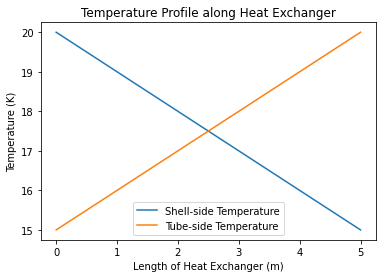

In [13]:
# Main Function
def main():
    inputs = get_input_or_sample()
    
    Q_shell = heat_transfer_rate(inputs["mass_flow_rate_shell"], Cp_water, inputs["delta_T_shell"])
    Q_tube = heat_transfer_rate(inputs["mass_flow_rate_tube"], Cp_water, inputs["delta_T_tube"])
    
    LMTD_value = lmtd(inputs["delta_T_shell"], inputs["delta_T_tube"])
    
    U = overall_heat_transfer_coefficient(inputs["U_shell"], inputs["U_tube"])
    
    A = heat_transfer_area(Q_shell, U, LMTD_value)
    
    delta_P_shell = pressure_drop_shell_and_tube(
        inputs["mass_flow_rate_shell"], 
        inputs["tube_length"], 
        inputs["tube_diameter"], 
        density=998,  # Density of water (kg/m^3)
        viscosity=0.001  # Viscosity of water (Pa*s)
    )
    
    delta_P_plate = pressure_drop_plate(
        inputs["mass_flow_rate_tube"], 
        inputs["plate_length"], 
        inputs["plate_spacing"], 
        density=998, 
        viscosity=0.001
    )
    
    print("\n--- Input Values ---")
    for key, value in inputs.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
    
    print("\n--- Calculated Results ---")
    print(f"Required Heat Transfer Area: {A:.2f} m^2")
    print(f"Pressure Drop for Shell-and-Tube: {delta_P_shell:.2f} Pa")
    print(f"Pressure Drop for Plate Heat Exchanger: {delta_P_plate:.2f} Pa")
    
    plot_temperature_profile(
        T_shell_in=inputs["delta_T_shell"], 
        T_shell_out=inputs["delta_T_tube"],
        T_tube_in=inputs["delta_T_tube"], 
        T_tube_out=inputs["delta_T_shell"], 
        length=inputs["tube_length"]
    )

if __name__ == "__main__":
    main()